In [7]:
from network import TCPPacket, TCPConnection
from cubic import TCPCubicConnection
from reno import TCPRenoConnection
from bbr import TCPBBRConnection
from matplotlib import pyplot as plt

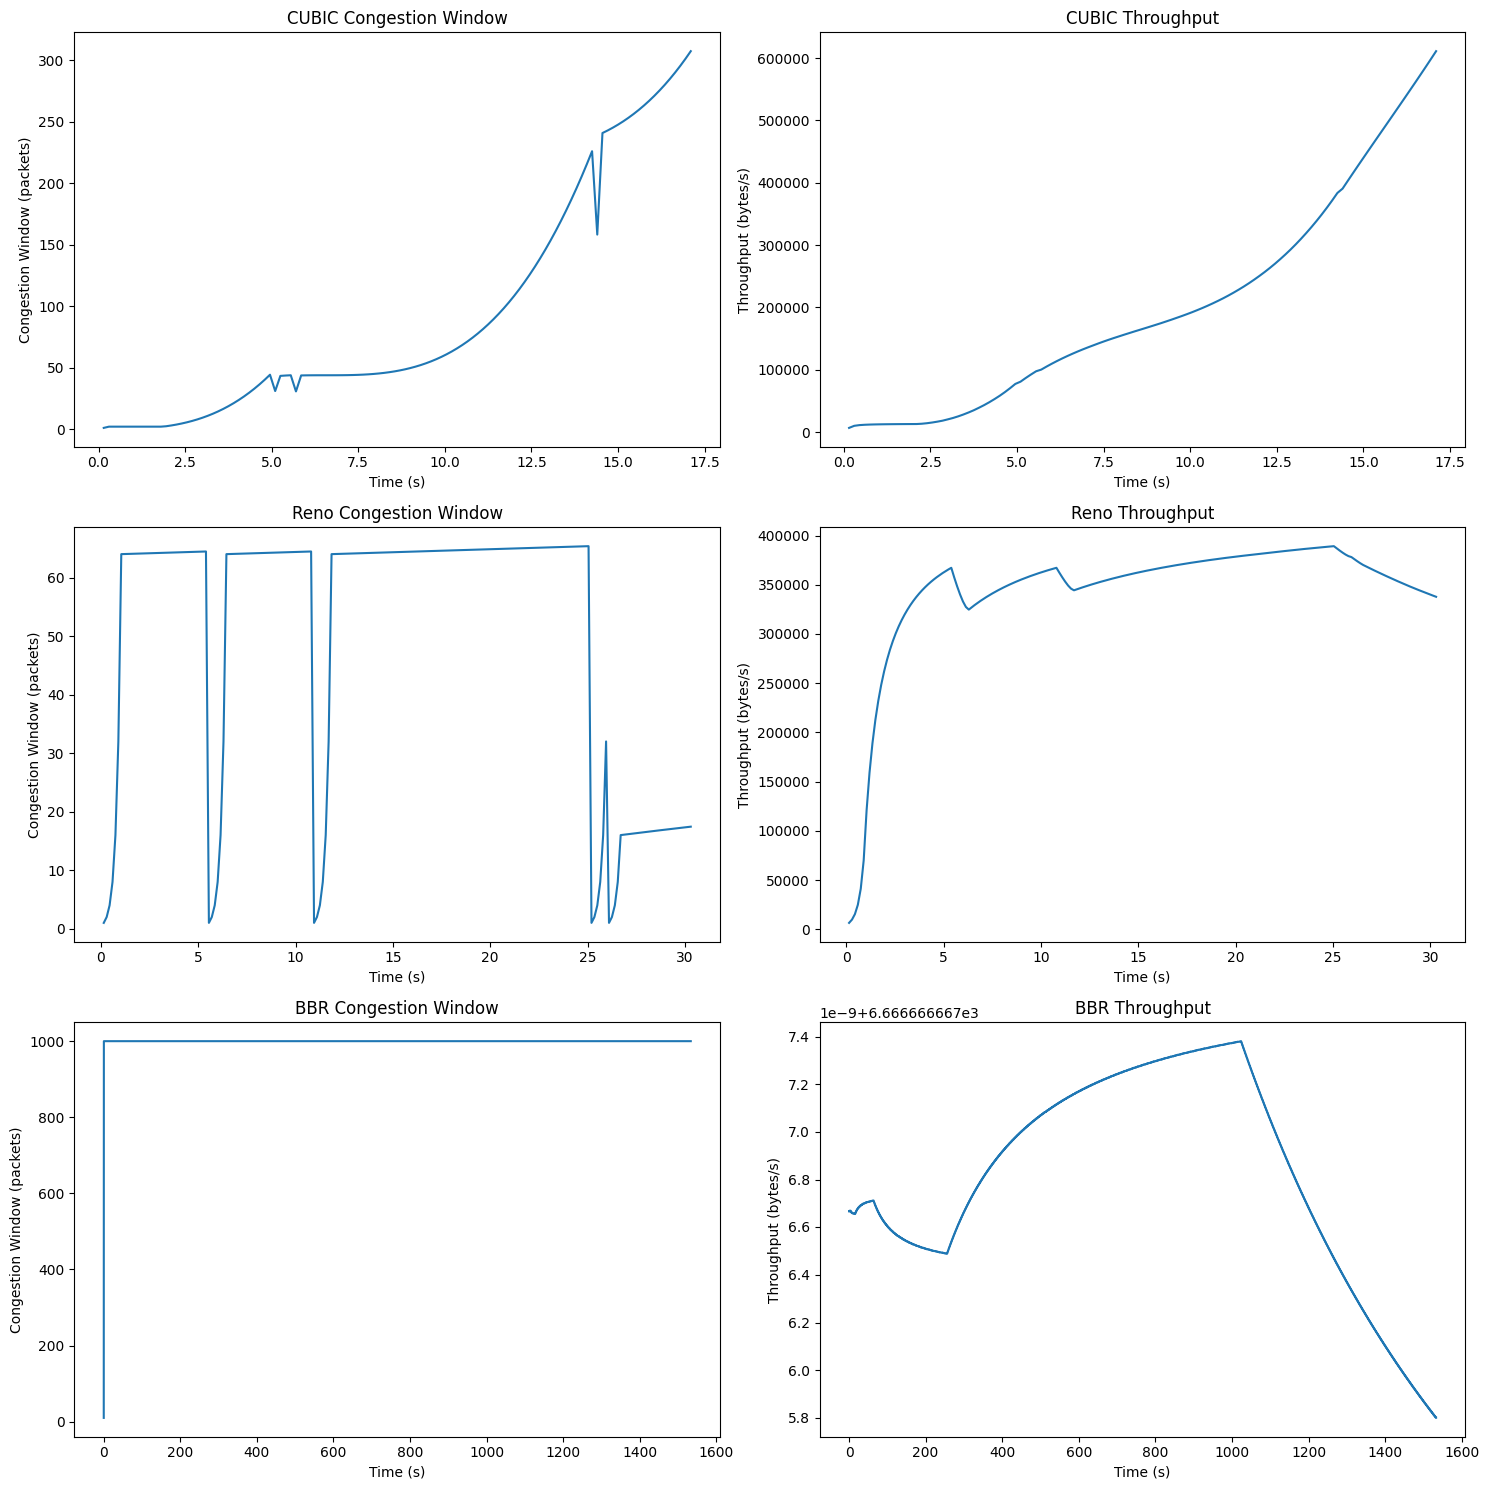

In [ ]:
def plot_all():
    # Simulate CUBIC
    cubic_client = TCPCubicConnection('CubicClient', rtt=0.15, loss_rate=0.02, max_packets=10000)
    cubic_server = TCPConnection('CubicServer')
    cubic_client.send(TCPPacket(seq=0, syn=True), cubic_server)
    cubic_data = "X" * 1000  # 1KB of data
    cubic_client.send_data(cubic_data, cubic_server)
    
    # Simulate Reno
    reno_client = TCPRenoConnection('RenoClient', rtt=0.15, loss_rate=0.02, max_packets=10000)
    reno_server = TCPConnection('RenoServer')
    reno_client.send(TCPPacket(seq=0, syn=True), reno_server)
    reno_data = "X" * 1000  # 1KB of data
    reno_client.send_data(reno_data, reno_server)
    
    # Simulate BBR
    bbr_client = TCPBBRConnection('BBRClient', rtt=0.15, loss_rate=0.02, max_packets=10000)
    bbr_server = TCPConnection('BBRServer')
    bbr_client.send(TCPPacket(seq=0, syn=True), bbr_server)
    bbr_data = "X" * 1000  # 1KB of data
    bbr_client.send_data(bbr_data, bbr_server)
    
    # Plot results
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    
    # Plot CUBIC
    axs[0, 0].plot(cubic_client.times, cubic_client.cwnds)
    axs[0, 0].set_title('CUBIC Congestion Window')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Congestion Window (packets)')
    
    axs[0, 1].plot(cubic_client.times, cubic_client.throughput)
    axs[0, 1].set_title('CUBIC Throughput')
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('Throughput (bytes/s)')
    
    # Plot Reno
    axs[1, 0].plot(reno_client.times, reno_client.cwnds)
    axs[1, 0].set_title('Reno Congestion Window')
    axs[1, 0].set_xlabel('Time (s)')
    axs[1, 0].set_ylabel('Congestion Window (packets)')
    
    axs[1, 1].plot(reno_client.times, reno_client.throughput)
    axs[1, 1].set_title('Reno Throughput')
    axs[1, 1].set_xlabel('Time (s)')
    axs[1, 1].set_ylabel('Throughput (bytes/s)')
    
    plt.tight_layout()
    plt.show()

plot_all()